# Modelo completo

- Semestres 2, 4, 6, 8
- 5 aulas (2 normales y 3 laboratorios)
- Lista de profesores disponibles por materia
- Heuristica de asignación por hora

In [9]:
class CSP:
    def __init__(self, variables, dominios, restricciones):
        """
        Inicializa un problema de satisfacción de restricciones.
        
        Args:
            variables: Lista de variables
            dominios: Diccionario con los dominios de cada variable
            restricciones: Función que verifica si una asignación satisface las restricciones
        """
        self.variables = variables
        self.dominios = dominios
        self.restricciones = restricciones
        self.vecinos = {var: [] for var in variables}
        
        for var in variables:
            for other_var in variables:
                if var != other_var:
                    self.vecinos[var].append(other_var)

def backtracking(assignment, csp):
    """
    Algoritmo de backtracking para resolver un CSP.
    
    Args:
        assignment: Diccionario con la asignación actual (variable -> valor)
        csp: Objeto CSP
        
    Returns:
        Una asignación completa o fallo (None)
    """
    if len(assignment) == len(csp.variables):
        return assignment  
    var = seleccionar_variable_no_asignada(csp.variables, assignment, csp)
    for valor in orden_valores_dominio(var, assignment, csp):
        if es_consistente(var, valor, assignment, csp):
            assignment[var] = valor
            resultado = backtracking(assignment, csp)
            if resultado is not None:
                return resultado
            del assignment[var]
    return None

def seleccionar_variable_no_asignada(variables, assignment, csp):
    """
    Selecciona una variable no asignada usando la heurística MRV (Minimum Remaining Values).
    
    Returns:
        La variable no asignada con el menor número de valores válidos en su dominio
    """
    variables_no_asignadas = [var for var in variables if var not in assignment]
    return min(variables_no_asignadas, key=lambda var: len(csp.dominios[var]))

def orden_valores_dominio(var, assignment, csp):
    """
    REVISAR
    Ordena los valores del dominio según una heurística.
    Por simplicidad, devolvemos el dominio sin ordenar.
    
    Returns:
        Lista de valores en el dominio de la variable
    """
    def prioridad(x):
        diferencia = abs(x[1] - 9)
        if x[1] == 11:
            diferencia += 4
        return diferencia

    sort = sorted(csp.dominios[var], key=prioridad)
    return sort

def es_consistente(var, valor, assignment, csp):
    """
    REVISAR
    Verifica si la asignación de valor a var es consistente con las restricciones.
    
    Returns:
        True si la asignación es consistente, False en caso contrario
    """
    assignment_temp = assignment.copy()
    assignment_temp[var] = valor
    return csp.restricciones(assignment_temp)

def AC3(csp):
    """
    Algoritmo AC-3 para consistencia de arcos.
    """

    cola = [(xi, xj) for xi in csp.variables for xj in csp.vecinos[xi]]
    while cola:
        xi, xj = cola.pop(0)
        if borrar_valores_inconsistentes(xi, xj, csp):
            if len(csp.dominios[xi]) == 0:
                return False
            for xk in csp.vecinos[xi]:
                if xk != xj:
                    cola.append((xk, xi))
    return True

def borrar_valores_inconsistentes(xi, xj, csp):
    """
    REVISAR
    Borra valores inconsistentes del dominio de xi con respecto a xj.
    
    Args:
        xi, xj: Variables
        csp: Objeto CSP
        
    Returns:
        True si se borró algún valor, False en caso contrario
    """
    borrado = False
    valores_a_borrar = []
    for x in csp.dominios[xi]:
        satisface_restriccion = False
        for y in csp.dominios[xj]:
            assignment_temp = {xi: x, xj: y}
            if csp.restricciones(assignment_temp):
                satisface_restriccion = True
                break
        if not satisface_restriccion:
            valores_a_borrar.append(x)
            borrado = True
    for valor in valores_a_borrar:
        csp.dominios[xi].remove(valor)
    
    return borrado

**Restricciones:**

- Cursos del mismo semestre no pueden ocurrir a la misma hora
- Ningun par de cursos pueden ocurrir en el mismo salon a la misma hora  
- Un profesor no puede dar mas de un curso a la misma hora

In [10]:

def cursos_lcc_cps():
    cursos_segundo_semestre = [
        'Calculo II',
        'Algebra lineal I',
        'Mecanica I',
        'Matematicas discretas',
        'Programacion de computadoras',
        'Caracteristicas de la Sociedad Actual',
        'Historia de la Ciencia y la Tecnologia'
    ]

    cursos_cuarto_semestre = [
        'Probabilidad',
        'Electromagnetismo',
        'Estructura de datos',
        'Ingenieria de software I',
        'Teoria de la computacion',
        'Etica y desarrollo profesional',
        'Historia de Mexico'
    ]

    cursos_sexto_semestre = [
        'IA',
        'Arquitectura de computadoras',
        'Analisis de algoritmos',
        'Bases de datos',
        'Graficacion por computadora',
        'Topicos avanzados de CC'
    ]

    cursos_octavo_semestre = [
        'Redes II',
        'Procesos paralelos y distribuidos',
        'Seminario de IA'
    ]

    cursos_requieren_laboratorio = [
        'Programacion de computadoras',
        'Estructura de datos',
        'IA',
        'Arquitectura de computadoras',
        'Bases de datos',
        'Topicos avanzados de CC',
        'Redes II',
        'Procesos paralelos y distribuidos',
        'Seminario de IA'
    ]

    variables = cursos_segundo_semestre + cursos_cuarto_semestre + cursos_sexto_semestre + cursos_octavo_semestre

    # Dominio
    aulas = {'3K4-101': 'aula sencilla',
             '3K4-102': 'aula sencilla',
             '3K4-103': 'laboratorio',
             '3K4-201': 'laboratorio',
             '3K4-202': 'laboratorio',
            }

    horas = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

    profesores = {
        'Calculo II':['Prof. Anonimo 1', 'Prof. Anonimo 2', 'Prof. Anonimo 3'],
        'Algebra lineal I':['Prof. Anonimo 2', 'Prof. Anonimo 4', 'Prof. Anonimo 6'],
        'Mecanica I':['Prof. Anonimo 5', 'Prof. Anonimo 4', 'Prof. Anonimo 7'],
        'Matematicas discretas':['Eduardo','Edelmira','Irene'],
        'Programacion de computadoras':['Adrian','Irene'],
        'Caracteristicas de la Sociedad Actual':['Prof. Tronco 1', 'Prof. Tronco 2'],
        'Historia de la Ciencia y la Tecnologia':['Prof. Humanidades 1', 'Prof. Humanidades 2'], 
        'Probabilidad':['Prof. Anonimo 1', 'Prof. Anonimo 3', 'Prof. Anonimo 8'],
        'Electromagnetismo':['Prof. Anonimo 5', 'Prof. Anonimo 7'],
        'Estructura de datos':['Irene', 'Eduardo'],
        'Ingenieria de software I':['Mireles', 'Juan Pablo'],
        'Teoria de la computacion':['Gutu'],
        'Etica y desarrollo profesional':['Prof. Tronco 1', 'Prof. Tronco 3'],
        'Historia de Mexico':['Prof. Humanidades 2'],
        'IA':['Waissman','Eduardo'],
        'Arquitectura de computadoras':['Villa'],
        'Analisis de algoritmos':['Roberto'],
        'Bases de datos':['Mireles', 'Juan Pablo'],
        'Graficacion por computadora':['Roberto'],
        'Topicos avanzados de CC':['Adrian'],
        'Redes II':['Donald'],
        'Procesos paralelos y distribuidos':['Edelmira'],
        'Seminario de IA':['Sonia']
    }

    # Dominio: pares (aula, hora, profesor)
    dominio = {}
    for curso in variables:
        if curso in cursos_requieren_laboratorio:
            aulas_validas = [a for a, tipo in aulas.items() if tipo == 'laboratorio']
        else:
            aulas_validas = list(aulas.keys())
    
        dominio[curso] = [
            (aula, hora, profesor)
            for aula in aulas_validas
            for hora in horas
            for profesor in profesores.get(curso)
        ]

    def cursos_restricciones(assignment):
        asignados = list(assignment.items())        
        for i in range(len(asignados)):
            curso1, (aula1, hora1, profesor1) = asignados[i]
            for j in range(i + 1, len(asignados)):
                curso2, (aula2, hora2, profesor2) = asignados[j]
                
                # Restricción 1: Ningun par de cursos pueden ocurrir en el mismo salon a la misma hora
                if aula1 == aula2 and hora1 == hora2:
                    return False     
                
                # Restricción 2: Cursos del mismo semestre no pueden ocurrir a la misma hora
                if curso1 in cursos_segundo_semestre and curso2 in cursos_segundo_semestre and hora1 == hora2:
                    return False
                if curso1 in cursos_cuarto_semestre and curso2 in cursos_cuarto_semestre and hora1 == hora2:
                    return False
                if curso1 in cursos_sexto_semestre and curso2 in cursos_sexto_semestre and hora1 == hora2:
                    return False
                if curso1 in cursos_octavo_semestre and curso2 in cursos_octavo_semestre and hora1 == hora2:
                    return False
                
                # Restricción 3: Un profesor no puede dar mas de un curso a la misma hora
                if profesor1 == profesor2 and hora1 == hora2:
                    return False
        return True

    csp = CSP(variables, dominio, cursos_restricciones)    
    AC3(csp)
    return backtracking({}, csp)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def imprimir_horario(data):
    aulas = ['3K4-101', '3K4-102', '3K4-103', '3K4-201', '3K4-202']
    horas = ['7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00']
    
    horario = {'Hora': horas}
    for aula in aulas:
        horario[aula] = ['' for _ in range(len(horas))]
    
    for materia, (aula, hora, profesor) in data.items():
        if aula in aulas:
            # Calcular el índice de hora (restando 7 porque empezamos en 7:00)
            hora_index = hora - 7
            if 0 <= hora_index < len(horas):
                horario[aula][hora_index] = f"{materia}\n({profesor})"
    
    df = pd.DataFrame(horario)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis('tight')
    ax.axis('off')
    
    tabla = ax.table(cellText=df.values, colLabels=df.columns, 
                     cellLoc='center', loc='center')
    
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(9)
    tabla.scale(1.0, 2.0)
    
    for (row, col), cell in tabla.get_celld().items():
        if row == 0:  # Encabezado
            cell.set_text_props(weight='bold')

    for i in range(len(df.columns)):
        tabla.auto_set_column_width(i)

    plt.title("Programación de las materias de LCC (semestre par)", fontsize=14, weight='bold')
    plt.tight_layout()
    plt.show()

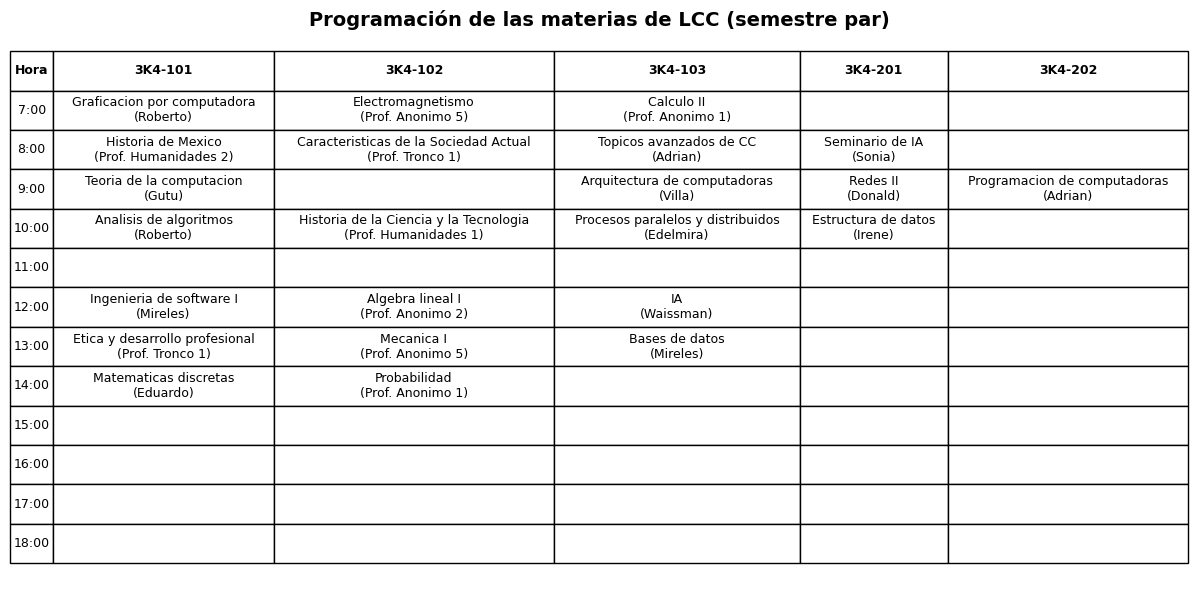

In [12]:
if __name__ == "__main__":
    solucion = cursos_lcc_cps()
    imprimir_horario(solucion)
    